In [73]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [74]:
# 1. Load Data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Simpan dataset ke dalam file CSV
df.to_csv("breast_cancer_dataset.csv", index=False)
print("Dataset telah disimpan sebagai 'breast_cancer_dataset.csv'")

# Tampilkan 5 baris teratas
df.head()


Dataset telah disimpan sebagai 'breast_cancer_dataset.csv'


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [75]:
# 2. Preprocessing Data
# Pengecekan missing value
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Pengecekan duplikat
duplicates = df.duplicated().sum()
print("Jumlah duplikat:", duplicates)

# Memisahkan fitur dan target
X = df.drop(columns=['target'])
y = df['target']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Jumlah duplikat: 0


C:\Users\victus\AppData\Local\Temp\ipykernel_25840\3950474315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='crest')


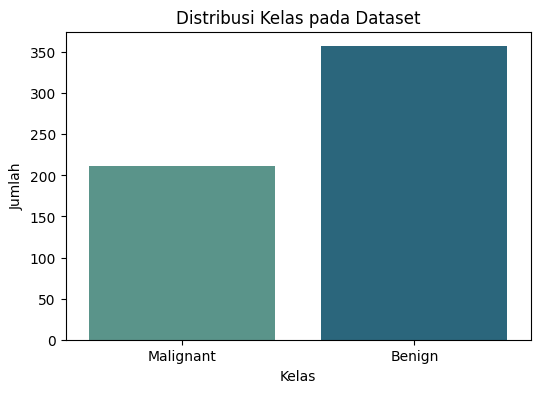

In [76]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='crest')
plt.title('Distribusi Kelas pada Dataset')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

In [77]:
# 3. Processing Data - Hyperparameter Tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svm.best_params_)

param_grid_knn = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best parameters for KNN: {'n_neighbors': 7}


In [78]:
# 4. Training model dengan SVM
svm_model = SVC(C=grid_svm.best_params_['C'], kernel=grid_svm.best_params_['kernel'], probability=True)
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Training model dengan KNN
knn_model = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)

# Prediksi dengan KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



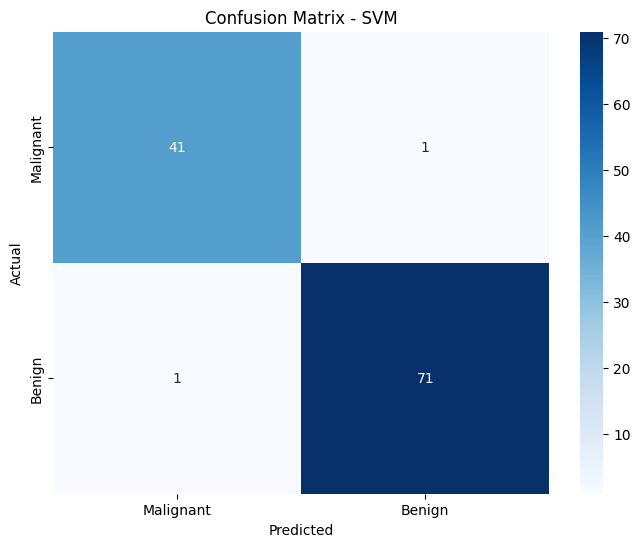

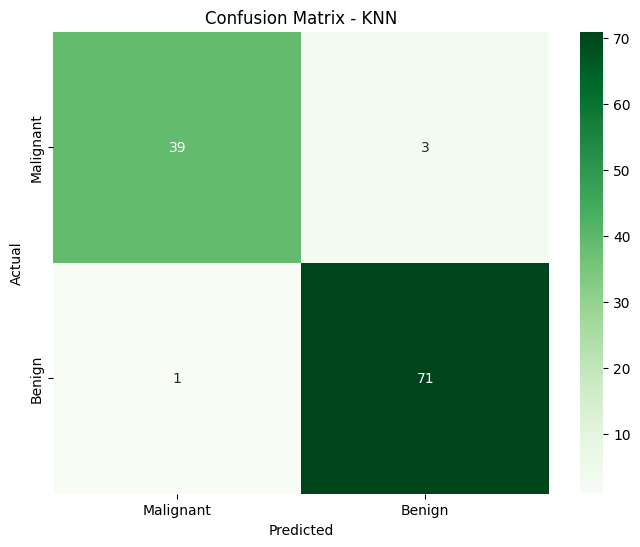

In [79]:
# 5. Visualisasi
# Visualisasi Confusion Matrix untuk SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Visualisasi Confusion Matrix untuk KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

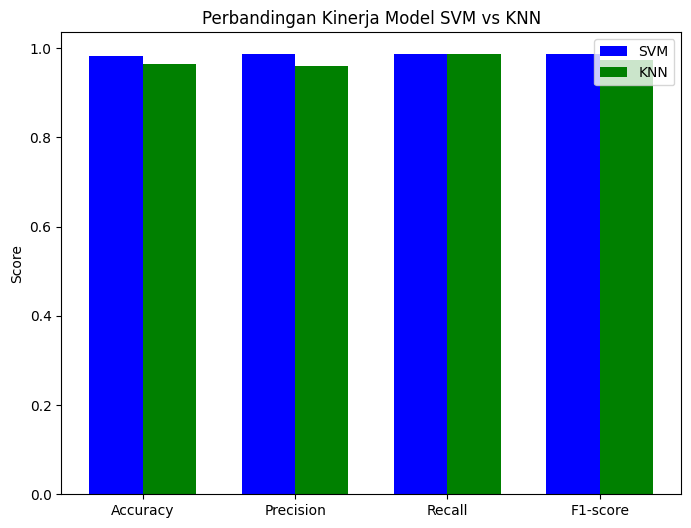

In [80]:
# Visualisasi Perbandingan Akurasi, Precision, Recall, dan F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_scores = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]
knn_scores = [
    accuracy_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_knn)
]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN', color='green')

ax.set_ylabel('Score')
ax.set_title('Perbandingan Kinerja Model SVM vs KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


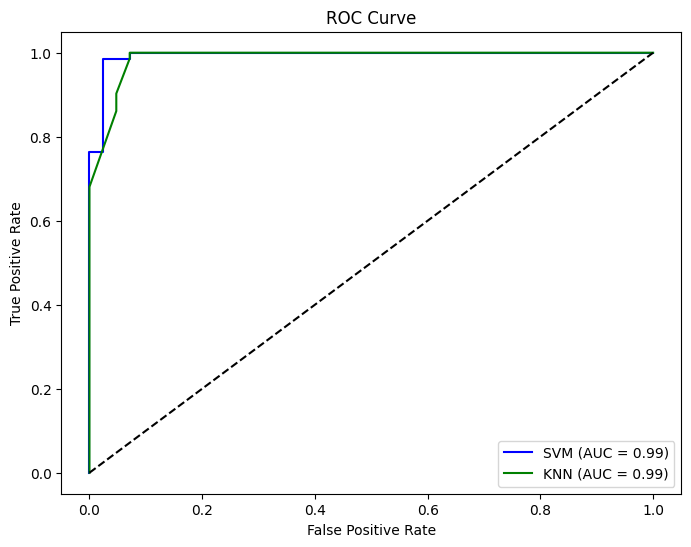

In [81]:
# Visualisasi ROC Curve
y_scores_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = auc(fpr_svm, tpr_svm)

y_scores_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
